In [1]:
import os
from modules.analyze_session_stats import analyze_session_stats

# 1) List your CSVs and titles
DATASETS = [
    'Resampled/BTCUSD_30m.csv',
    'Resampled/BTCUSD_1h.csv',
    'Resampled/BTCUSD_1d.csv',
]
TITLES = [
    '30-Minute',
    '1-Hour',
    '1-Day',
]

# 2) Where to put the session stats
OUTPUT_FOLDER = 'AnalysisResults'

# ensure the output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# run the analysis for each timeframe
for csv_path, title in zip(DATASETS, TITLES):
    analyze_session_stats(csv_path, title, OUTPUT_FOLDER)


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Session Stats: 30-Minute ===
                            range               ATR_14               \
                             mean      max        mean          max   
session                                                               
Asia                   232.659434  8275.86  254.526839  1840.324286   
Asia + London Overlap  216.729907  2418.55  224.594006  1576.157857   
London                 237.794038  6587.35  220.578151  1917.249286   
London + NY Overlap    334.919418  5764.05  250.061313  2187.215000   
New York               300.402494  5306.71  296.749285  3014.570714   
Other                  263.320979  7083.76  291.696949  2285.768571   

                      price_return              abs_return              \
                              mean         std        mean         std   
session                                                                  
Asia                     -0.186088  199.577402  112.139546  165.092108   
Asia + London Overlap     0.63

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Session Stats: 1-Hour ===
                            range               ATR_14               \
                             mean      max        mean          max   
session                                                               
Asia                   334.240223  8275.86  394.689749  3550.540000   
Asia + London Overlap  313.647185  3235.56  354.631348  2163.305714   
London                 341.435623  7442.23  340.669253  2291.030000   
London + NY Overlap    486.927490  7394.21  347.338429  2529.571429   
New York               430.333580  6783.34  373.687706  3151.238571   
Other                  376.829785  7083.76  401.971920  3434.988571   

                      price_return              abs_return              \
                              mean         std        mean         std   
session                                                                  
Asia                     -0.510991  279.105455  157.217392  230.609787   
Asia + London Overlap     1.21433

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


→ saved plot: AnalysisResults\candle range_dist_1-Day.png
→ saved plot: AnalysisResults\candle return_dist_1-Day.png
→ saved plot: AnalysisResults\atr_14_dist_1-Day.png
→ saved plot: AnalysisResults\range efficiency_dist_1-Day.png


In [ ]:
%load_ext autoreload
%autoreload 2


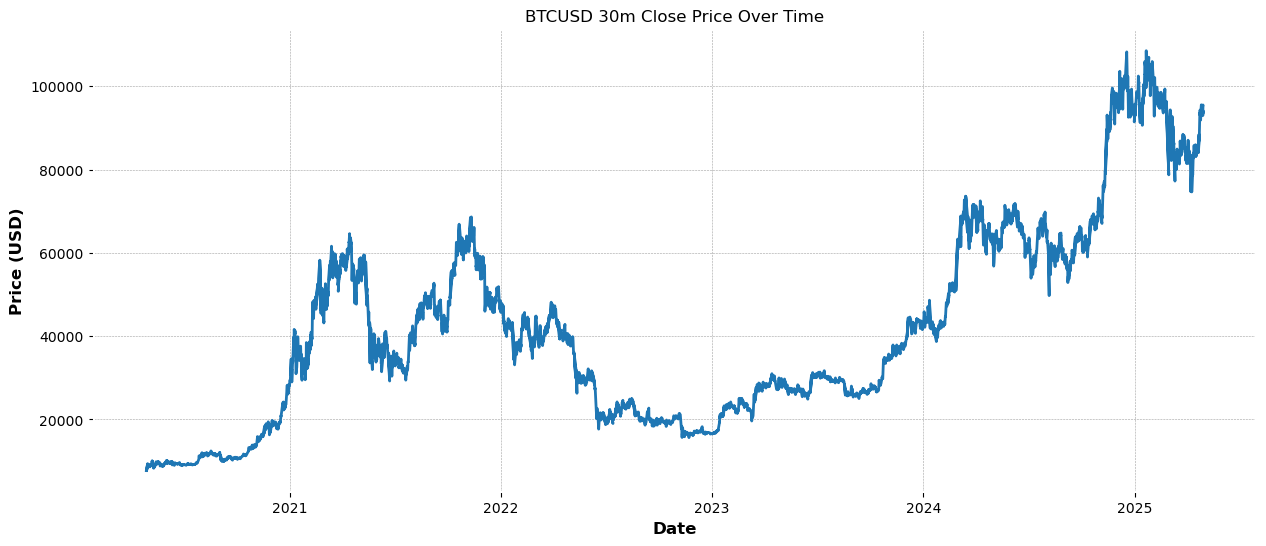

In [30]:
# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# Line chart
plt.figure(figsize=(15,6))
plt.plot(df.index, df['close'])
plt.title('BTCUSD 30m Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


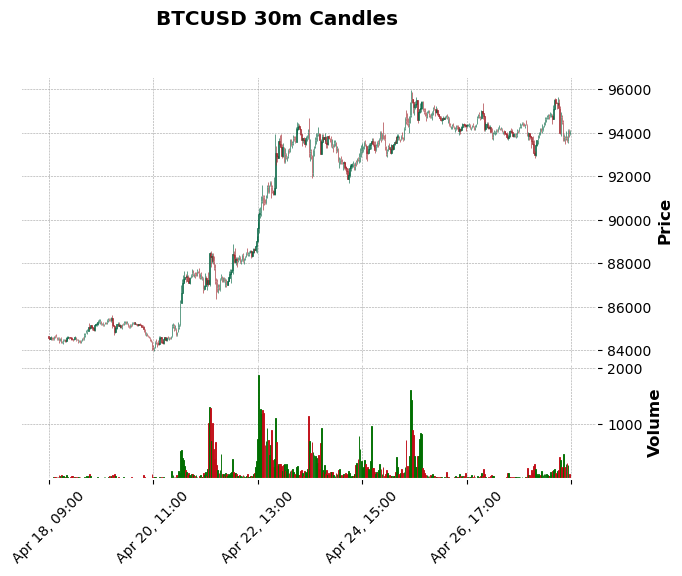

In [31]:
import mplfinance as mpf

# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# For mplfinance, dataframe must have columns: Open, High, Low, Close (capitalized)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot candlestick chart
mpf.plot(df[-500:], type='candle', style='charles', title='BTCUSD 30m Candles', volume=True)


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Combined Session Movement and Volatility Stats ===
                 session   range_mean  range_max  ATR_14_mean   ATR_14_max  \
0                   Asia   232.659434    8275.86   254.526839  1840.324286   
1  Asia + London Overlap   216.729907    2418.55   224.594006  1576.157857   
2                 London   237.794038    6587.35   220.578151  1917.249286   
3    London + NY Overlap   334.919418    5764.05   250.061313  2187.215000   
4               New York   300.402494    5306.71   296.749285  3014.570714   
5                  Other   263.320979    7083.76   291.696949  2285.768571   
0                   Asia   334.240223    8275.86   394.689749  3550.540000   
1  Asia + London Overlap   313.647185    3235.56   354.631348  2163.305714   
2                 London   341.435623    7442.23   340.669253  2291.030000   
3    London + NY Overlap   486.927490    7394.21   347.338429  2529.571429   
4               New York   430.333580    6783.34   373.687706  3151.238571   
5       

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


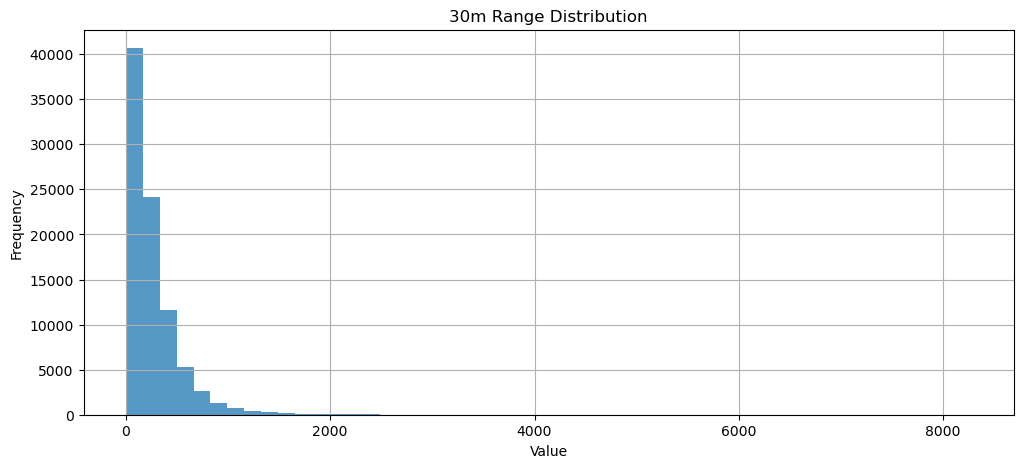

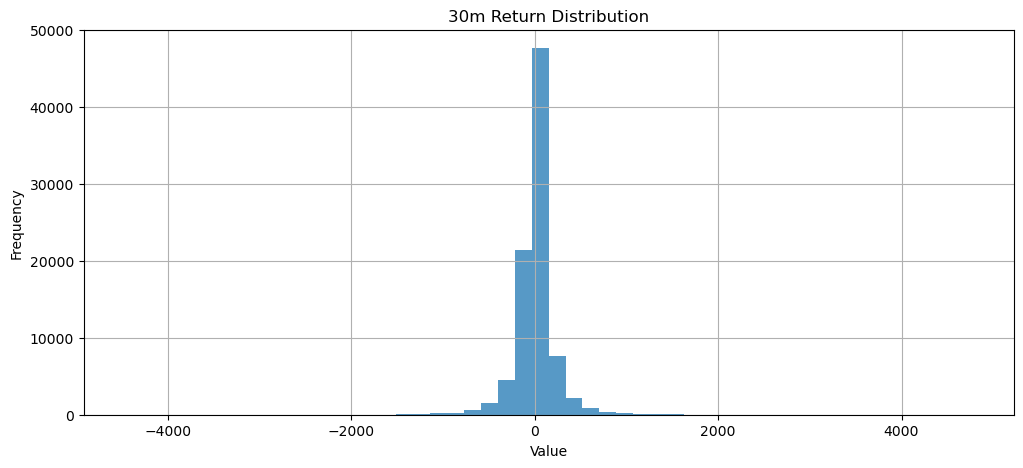

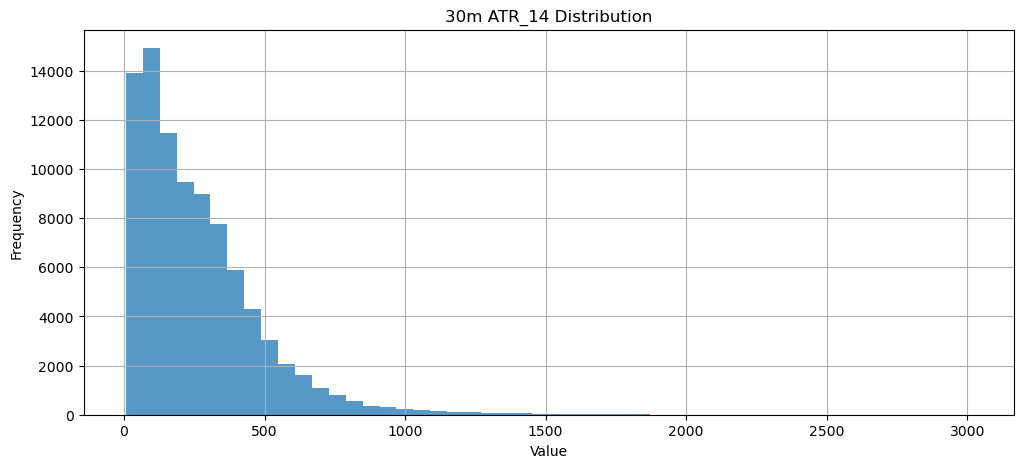

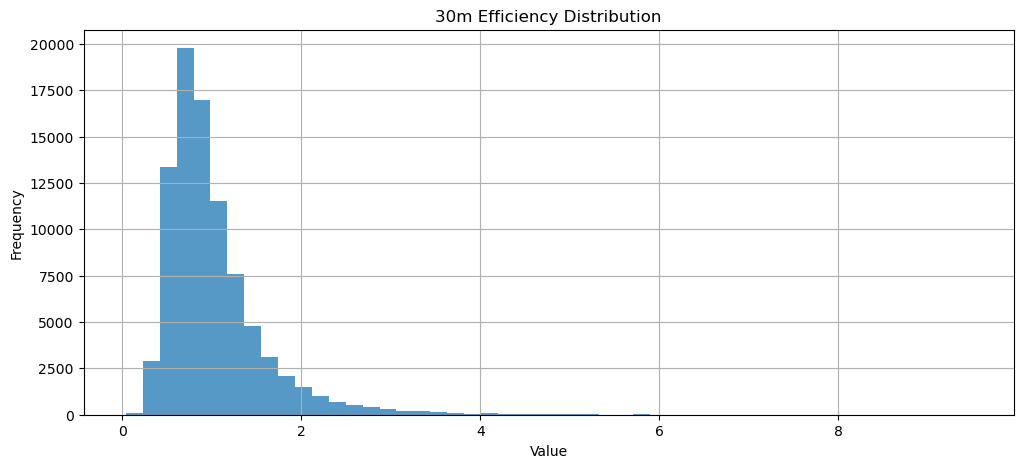

In [3]:
# main_runner.ipynb
import sys
sys.path.append('./')

# --- Setup Imports ---
import pandas as pd
from modules.timeframe_processor import process_timeframe
from visualization.plot_distributions import plot_distribution

# --- Process Each Timeframe ---
# Process all timeframes
df_30m, stats_30m = process_timeframe('./Resampled/BTCUSD_30m.csv', '30m')
df_1h, stats_1h = process_timeframe('./Resampled/BTCUSD_1h.csv', '1h')
df_1d, stats_1d = process_timeframe('./Resampled/BTCUSD_1d.csv', '1d')

# Combine all stats
all_stats = pd.concat([stats_30m, stats_1h, stats_1d])
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')


# --- View Results ---
print("\n=== Combined Session Movement and Volatility Stats ===")
print(all_stats)

# --- Save Results ---
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')
print("✅ Combined session stats saved to ./AnalysisResults/session_metrics_all_timeframes.csv")

# --- Plot Distributions (Optional) ---
# You can now plot for any df easily!
plot_distribution(df_30m['range'], '30m Range Distribution')
plot_distribution(df_30m['price_return'], '30m Return Distribution')
plot_distribution(df_30m['ATR_14'], '30m ATR_14 Distribution')
plot_distribution(df_30m['efficiency'], '30m Efficiency Distribution')

# Same thing can be done for 1h, 1d if needed


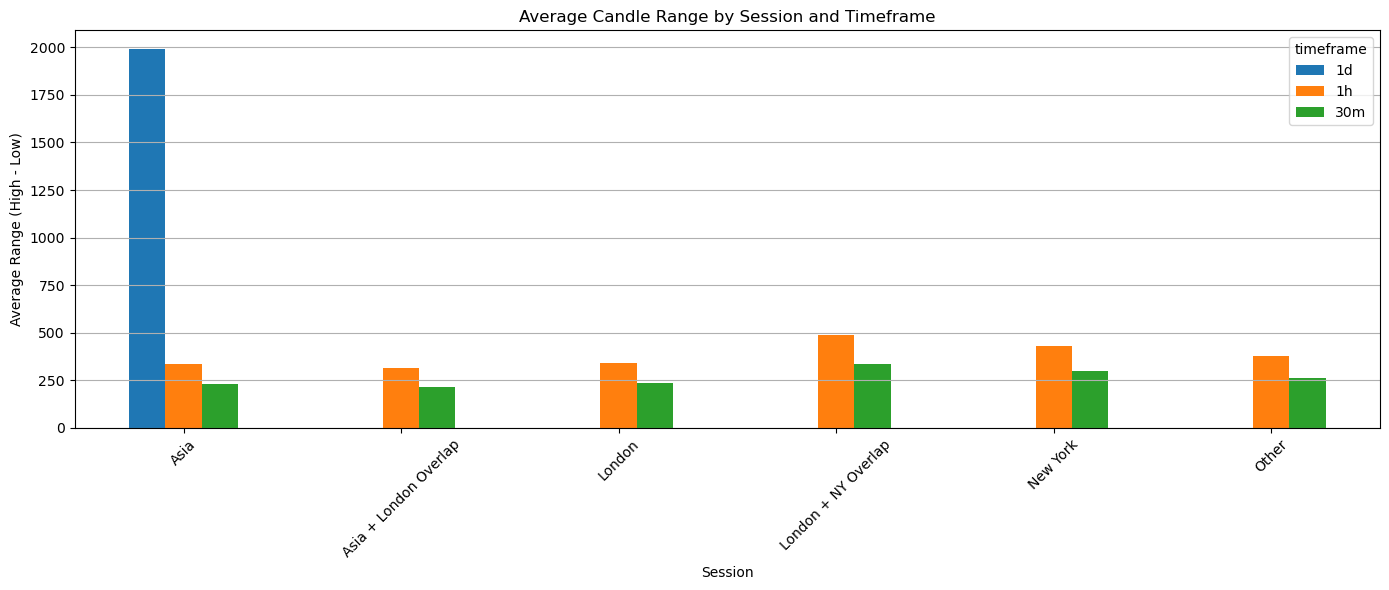

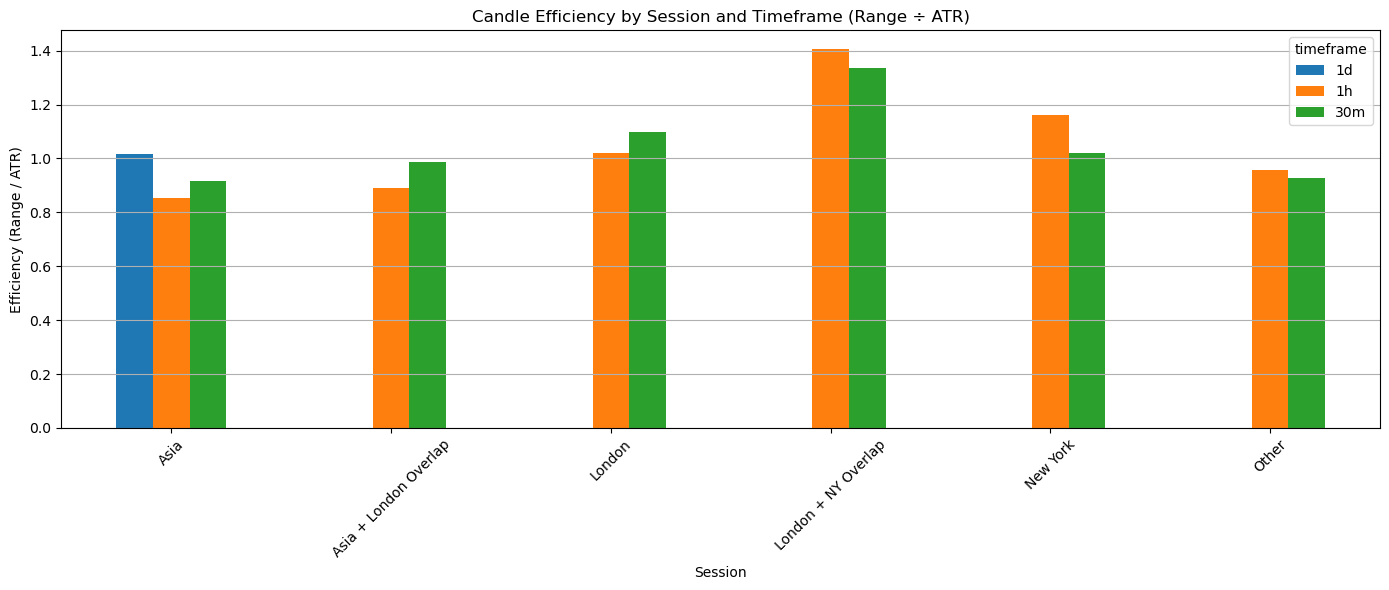

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correct session metrics file
df = pd.read_csv('./AnalysisResults/session_metrics_all_timeframes.csv')  # ✅ Correct path

# Reset index and clean
df = df.reset_index(drop=True)
df = df.dropna(subset=['range_mean', 'efficiency_mean', 'timeframe', 'session'])

# --- Plot 1: Average Range ---
pivot_range = df.pivot(index='session', columns='timeframe', values='range_mean')
pivot_range.plot(kind='bar', figsize=(14, 6), title='Average Candle Range by Session and Timeframe')
plt.ylabel('Average Range (High - Low)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Plot 2: Range Efficiency ---
pivot_eff = df.pivot(index='session', columns='timeframe', values='efficiency_mean')
pivot_eff.plot(kind='bar', figsize=(14, 6), title='Candle Efficiency by Session and Timeframe (Range ÷ ATR)')
plt.ylabel('Efficiency (Range / ATR)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [6]:
from modules.session_aggregator import build_session_ohlc

# make sure all your price columns are lowercase
df_30m.columns = [col.lower() for col in df_30m.columns]

# --- Build session-level candles from 30m data ---
session_df = build_session_ohlc(df_30m)          # no 'timeframe' arg here
# if you want to tag the timeframe in the output:
session_df['timeframe'] = '30m'

session_df.to_csv(
    './AnalysisResults/session_candles_from_30m.csv',
    index=False
)
print("✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv")


✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv


In [7]:
print(df_30m.columns.tolist())


['open', 'high', 'low', 'close', 'volume', 'session', 'range', 'price_return', 'abs_return', 'atr_14', 'efficiency']


In [9]:
import pandas as pd
from modules.metrics_calculator import calculate_movement_metrics

# --- Load session‐level candles ---
session_df = pd.read_csv(
    './AnalysisResults/session_candles_from_30m.csv'
)

# --- Standardize column names to lowercase ---
session_df.rename(columns=str.lower, inplace=True)

# --- Drop any sessions missing a valid range ---
session_df.dropna(subset=['range'], inplace=True)

# --- Recompute movement & volatility metrics for session bars ---
# This will add:
#   - 'price_return'
#   - 'abs_return'
#   - 'ATR_14'
#   - 'efficiency'
session_df = calculate_movement_metrics(
    session_df,
    atr_window=14
)

# --- (Optional) alias price_return back to 'return' if you need it ---
session_df['return'] = session_df['price_return']

# --- Final cleaning of infinities & NaNs ---
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Group by session and compute summary stats ---
session_stats = session_df.groupby('session').agg({
    'range':        ['mean','max'],
    'ATR_14':       ['mean','max'],
    'price_return': ['mean','std'],
    'abs_return':   ['mean','std'],
    'efficiency':   'mean'
})

# Flatten the MultiIndex and round to 2 decimal places
session_stats.columns = ['_'.join(col) for col in session_stats.columns]
session_stats = session_stats.round(2)

# --- Print and save results ---
print("=== Corrected Session‐Level Daily Stats ===")
print(session_stats)

session_stats.to_csv(
    './AnalysisResults/session_level_daily_stats.csv'
)


=== Corrected Session‐Level Daily Stats ===
                       range_mean  range_max  ATR_14_mean  ATR_14_max  \
session                                                                 
Asia                       935.94   11543.09       764.45     4010.01   
Asia + London Overlap      313.79    3235.56       731.37     3998.87   
London                     778.97    9083.67       720.29     3798.20   
London + NY Overlap        707.45    8035.00       748.43     4025.65   
New York                   988.88   10111.23       763.48     3850.78   
Other                      773.84    7522.11       768.22     3906.67   

                       price_return_mean  price_return_std  abs_return_mean  \
session                                                                       
Asia                               -4.26            751.21           426.75   
Asia + London Overlap               1.22            262.68           152.89   
London                             25.56            608

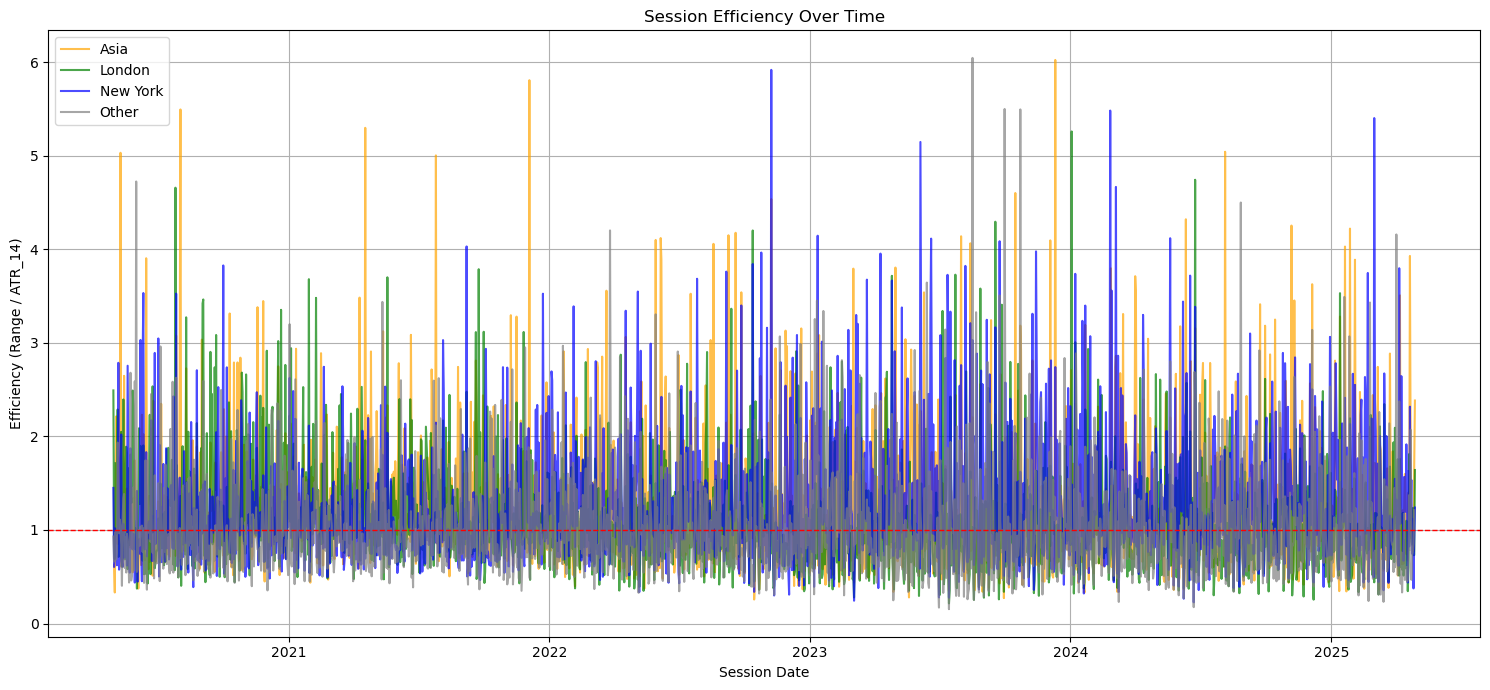

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from modules.metrics_calculator import calculate_movement_metrics

# --- Load session-level candles and index on the date ---
session_df = pd.read_csv(
    './AnalysisResults/session_candles_from_30m.csv',
    parse_dates=['date']
)
session_df.set_index('date', inplace=True)
session_df.sort_index(inplace=True)

# --- Drop any sessions missing a valid range ---
session_df.dropna(subset=['range'], inplace=True)

# --- Recompute movement & volatility metrics on session bars ---
# This will add: price_return, abs_return, ATR_14, efficiency
session_df = calculate_movement_metrics(session_df, atr_window=14)

# --- Optional alias: if you still need a 'return' column ---
session_df['return'] = session_df['price_return']

# --- Clean up infinities and NaNs ---
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Prepare for plotting ---
# Use the datetime index ('date') as the x‐axis
sessions = ['Asia', 'London', 'New York', 'Other']
colors   = {'Asia': 'orange', 'London': 'green', 'New York': 'blue', 'Other': 'gray'}

plt.figure(figsize=(15, 7))
for sess in sessions:
    data = session_df[session_df['session'] == sess]
    plt.plot(
        data.index,
        data['efficiency'],
        label=sess,
        color=colors.get(sess, 'black'),
        alpha=0.7
    )

# horizontal line at efficiency = 1.0
plt.axhline(1.0, color='red', linestyle='--', linewidth=1)

plt.title('Session Efficiency Over Time')
plt.xlabel('Session Date')
plt.ylabel('Efficiency (Range / ATR_14)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
from modules.session_labeler import label_and_save_sessions

# 1h data
raw_1h, feat_1h = label_and_save_sessions(
    './Resampled/BTCUSD_1h.csv',  # file_path
    'BTCUSD_1h',                  # output_prefix
    timestamp_col='time',
    output_base='./Resampled'
)

# 30m data
raw_30m, feat_30m = label_and_save_sessions(
    './Resampled/BTCUSD_30m.csv',
    'BTCUSD_30m',
    timestamp_col='time',
    output_base='./Resampled'
)

# 1d data
raw_1d, feat_1d = label_and_save_sessions(
    './Resampled/BTCUSD_1d.csv',
    'BTCUSD_1d',
    timestamp_col='time',
    output_base='./Resampled'
)

print("✅ Labeled & saved raw/feature CSVs for 1h, 30m, and 1d data.")


✅ Labeled & saved raw/feature CSVs for 1h, 30m, and 1d data.


In [15]:
from modules.timestamp_features import add_timestamp_features
from modules.volatility_features import add_volatility_features


# --- 30m ---
df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')

# --- 1h ---
df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')

# --- 1d ---
df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
df_1d = add_volatility_features(df_1d) 
df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')


In [16]:

df = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print(df.columns)


Index(['time', 'open', 'high', 'low', 'close', 'volume', 'session', 'date',
       'time_of_day', 'hour', 'minute', 'weekday', 'month', 'range',
       'price_return', 'abs_return', 'ATR_14', 'efficiency', 'range_change',
       'efficiency_change', 'volatility_spike', 'rolling_volatility_std'],
      dtype='object')


In [17]:
import pandas as pd
from modules.timestamp_features import add_timestamp_features
from modules.volatility_features import add_volatility_features
from modules.combined_features import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)

# === Load 30m data ===
df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')

# === Apply all feature layers ===
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m = add_session_structure_features(df_30m)
df_30m = add_candle_structure_features(df_30m)
df_30m = add_trend_continuation_features(df_30m)
df_30m = add_structure_zone_features(df_30m)
df_30m = add_meta_composite_features(df_30m)

# === Save updated dataset ===
df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print("✅ All features added and saved to BTCUSD_30m_features.csv")


✅ All features added and saved to BTCUSD_30m_features.csv


In [18]:
# === 1H Timeframe ===
df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h = add_session_structure_features(df_1h)
df_1h = add_candle_structure_features(df_1h)
df_1h = add_trend_continuation_features(df_1h)
df_1h = add_structure_zone_features(df_1h)
df_1h = add_meta_composite_features(df_1h)
df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')
print("✅ 1h features saved.")

# === 1D Timeframe ===
df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
# ⛔ Skip timestamp features — daily already represents 1 point per day
df_1d = add_volatility_features(df_1d)
df_1d = add_session_structure_features(df_1d)
df_1d = add_candle_structure_features(df_1d)
df_1d = add_trend_continuation_features(df_1d)
df_1d = add_structure_zone_features(df_1d)
df_1d = add_meta_composite_features(df_1d)
df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')
print("✅ 1d features saved.")

✅ 1h features saved.
✅ 1d features saved.


In [19]:
print(df_30m.iloc[0])

open                                        7768.04
high                                        7774.99
low                                         7752.33
close                                       7752.36
volume                                   281.525999
session                         London + NY Overlap
date                                     2020-04-28
time_of_day                                13:00:00
hour                                             13
minute                                            0
weekday                                           1
month                                             4
range                                         22.66
price_return                                 -15.68
abs_return                                    15.68
ATR_14                                    24.574286
efficiency                                 0.922102
range_change                                    NaN
efficiency_change                               NaN
volatility_s

In [20]:
df.iloc[[1, 14, 15, 25, 30, 40]]


,time,open,high,low,close,volume,session,date,time_of_day,hour,...,month,range,price_return,abs_return,ATR_14,efficiency,range_change,efficiency_change,volatility_spike,rolling_volatility_std
1,2020-04-28 07:00:00,7722.01,7722.01,7700.22,7705.17,90.753479,Asia + London Overlap,2020-04-28,07:00:00,7,...,4,21.79,-16.84,16.84,27.463571,0.793415,1.750201,1.917851,False,NaN
14,2020-04-28 13:30:00,7752.38,7759.24,7734.34,7734.39,417.890407,London + NY Overlap,2020-04-28,13:30:00,13,...,4,24.90,-17.99,17.99,25.463571,0.977868,1.098853,1.060476,False,6.533146
15,2020-04-28 14:00:00,7735.32,7746.87,7720.66,7735.69,350.557777,London + NY Overlap,2020-04-28,14:00:00,14,...,4,26.21,0.37,0.37,25.779286,1.016708,1.052610,1.039719,False,5.436942
25,2020-04-28 19:00:00,7748.06,7760.00,7731.37,7734.93,283.768515,New York,2020-04-28,19:00:00,19,...,4,28.63,-13.13,13.13,28.913571,0.990192,2.197237,2.218135,False,19.104708
30,2020-04-28 21:30:00,7732.84,7745.00,7726.43,7744.67,150.060883,Other,2020-04-28,21:30:00,21,...,4,18.57,11.83,11.83,24.877857,0.746447,1.167925,1.315504,False,6.909375
40,2020-04-29 02:30:00,7785.56,7812.58,7780.78,7795.00,496.145065,Asia,2020-04-29,02:30:00,2,...,4,31.80,9.44,9.44,32.714286,0.972052,0.203846,0.198421,False,42.136417
